# More Hot Plasma I Paper Comparisons

Checking for consistency in single-pulse examples of Paper I with Cargill. Seem to have some inconsistencies when it comes to bump in $\mathrm{EM}$ due to heating phase.

In [27]:
#Import needed modules
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
import ebtel_wrapper as ew

Set up a base dictionary. We'll modify it appropriately.

In [28]:
#input dictionary
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'classical',
              'solver':'euler','ic_mode':'st_eq','print_plasma_params':'True'}
config_dict['total_time'] = 5000
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 1.0
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 0.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000
config_dict['amp_switch'] = 'uniform'
config_dict['amp0'] = 0.001
config_dict['amp1'] = 0.01
config_dict['alpha'] = 1.5
config_dict['loop_length'] = 40.0
config_dict['num_events'] = 1
config_dict['t_pulse_half'] = 100
config_dict['h_nano'] = 0.1
config_dict['output_file'] = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/hp1_compare_v2'

In [29]:
def run_and_print(input_dict,tau,h0,L,f,flux_opt,par_list):
    #set params
    input_dict['t_pulse_half'] = tau/2.0
    input_dict['h_nano'] = h0
    input_dict['loop_length'] = L
    input_dict['sat_limit'] = f
    input_dict['heat_flux_option'] = flux_opt
    #print config file
    ew.print_xml_config(input_dict,config_file=input_dict['output_file']+'.xml')
    #run model
    ew.run_ebtel('/home/wtb2/Documents/EBTEL_C/bin/','',config_file=input_dict['output_file']+'.xml')
    #save parameters to list
    temp = np.loadtxt(input_dict['output_file']+'_dem.txt')
    par_list.append([temp[:,0],temp[:,4]])

We will be varying the pulse duration $\tau_H$, maximum heating rate $H_0$, and loop half-length $L$. In all cases, we will conserve the total energy density injected into the loop $q=10$ erg cm$^{-3}$ s$^{-1}$, which for triangular pulses, is written as $q=\tau_HH_0/2$.

## Section 1: Vary Pulse Duration

Here, we will look at several different values for the pulse duration $\tau_H=20,40,200,500$ s and see how this affects the resulting $\mathrm{EM}$.

In [30]:
tau_h = [20,40,200,500]
results_tau = []
for t in tau_h:
    run_and_print(config_dict,t,20.0/t,40.0,1,'classical',results_tau)

b'************************************************************************************\n            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       \n************************************************************************************\n\nOriginal code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill\nSee Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362\nSee also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174\n\nTranslation into the C Programming Language by Will Barnes,\nDept. of Physics & Astronomy, Rice University (2014)\n************************************************************************************\n\nINPUTS\n------\nTotal time: 5000 s\nTime step: 1.000000 s\nLoop half-length: 40.000000 Mm\nUsage option(see documentation): dem\nHeating pulse shape: triangle\nSolving equations using Euler method\nUsing Raymond-Klimchuk Loss Function\nUsing classical method to calculate the heat flux\nUsing new method t

Plot the resulting emission measures for all values of $\tau$.

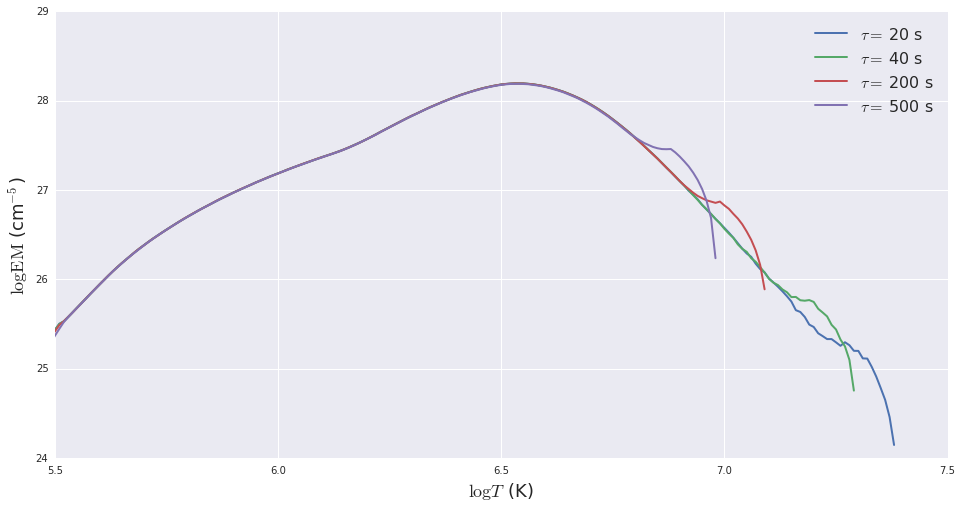

In [41]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for i in range(len(results_tau)):
    ax.plot(results_tau[i][0],results_tau[i][1],linewidth=2,label=r'$\tau=$ %d s'%tau_h[i])
ax.set_xlabel(r'$\log{T}$ (K)',fontsize=18)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
ax.set_xlim([5.5,7.5])
ax.set_ylim([24,29])
ax.legend(fontsize=16,loc='best')

## Section 2: Vary Heating Amplitude

Now, we'll look at a couple of different values of the heating rate, $H_0=0.05,0.1,0.2,0.5$ erg cm$^{-3}$ s$^{-1}$. Here, I have **not** conserved the total event energy and instead kept $\tau_H=200$ s. This seems to be what has been done in the draft of Paper I and will need clarification in the final draft. 

In [35]:
h0 = [.05,.1,.2,.5]
results_h0 = []
for h in h0:
    run_and_print(config_dict,200.0,h,40.0,1,'classical',results_h0)

b'************************************************************************************\n            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       \n************************************************************************************\n\nOriginal code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill\nSee Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362\nSee also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174\n\nTranslation into the C Programming Language by Will Barnes,\nDept. of Physics & Astronomy, Rice University (2014)\n************************************************************************************\n\nINPUTS\n------\nTotal time: 5000 s\nTime step: 1.000000 s\nLoop half-length: 40.000000 Mm\nUsage option(see documentation): dem\nHeating pulse shape: triangle\nSolving equations using Euler method\nUsing Raymond-Klimchuk Loss Function\nUsing classical method to calculate the heat flux\nUsing new method t

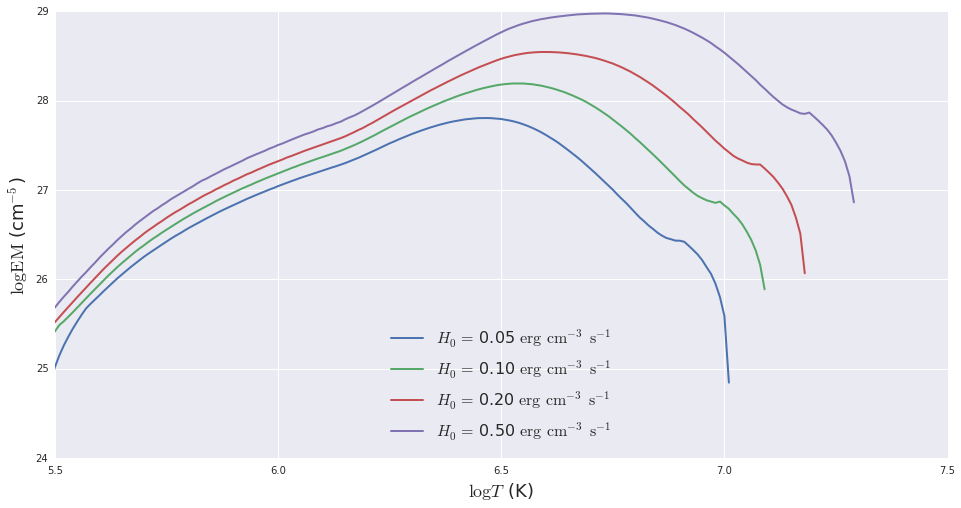

In [40]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for i in range(len(results_h0)):
    ax.plot(results_h0[i][0],results_h0[i][1],linewidth=2,
            label=r'$H_0=$ %.2f $\mathrm{erg}\,\mathrm{cm}^{-3}\,\mathrm{s}^{-1}$'%h0[i])
ax.set_xlabel(r'$\log{T}$ (K)',fontsize=18)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
ax.set_xlim([5.5,7.5])
ax.set_ylim([24,29])
ax.legend(fontsize=16,loc='best')

## Section 3: Vary Loop Length

Here, we'll simply vary the loop half-length for three different values of $L=20,40,75$ Mm to see how this affects $\mathrm{EM}$. In the nanoflare train cases, I've found that this steepens/truncates the cool side because the cooling timescale is roughly $\tau_{cool}\propto L$ (i.e. it takes longer for longer loops to cool).

In [37]:
loop_length = [20.0,40.0,75.0]
results_ll = []
for l in loop_length:
    run_and_print(config_dict,200.0,0.1,l,1,'classical',results_ll)

b'************************************************************************************\n            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       \n************************************************************************************\n\nOriginal code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill\nSee Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362\nSee also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174\n\nTranslation into the C Programming Language by Will Barnes,\nDept. of Physics & Astronomy, Rice University (2014)\n************************************************************************************\n\nINPUTS\n------\nTotal time: 5000 s\nTime step: 1.000000 s\nLoop half-length: 20.000000 Mm\nUsage option(see documentation): dem\nHeating pulse shape: triangle\nSolving equations using Euler method\nUsing Raymond-Klimchuk Loss Function\nUsing classical method to calculate the heat flux\nUsing new method t

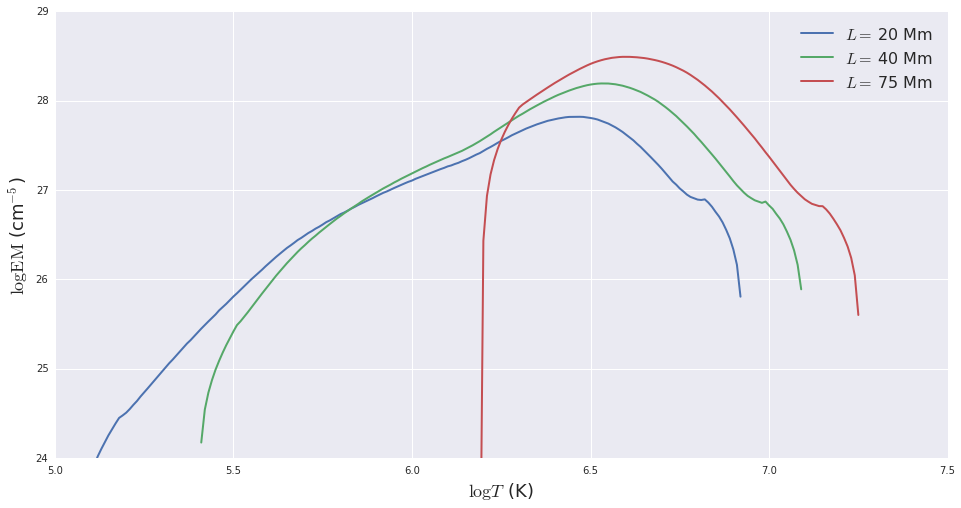

In [39]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for i in range(len(results_ll)):
    ax.plot(results_ll[i][0],results_ll[i][1],linewidth=2,label=r'$L=$ %d Mm'%loop_length[i])
ax.set_xlabel(r'$\log{T}$ (K)',fontsize=18)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
ax.set_xlim([5,7.5])
ax.set_ylim([24,29])
ax.legend(fontsize=16,loc='best')

## Section 4: Change Heat Flux Limiter

Finally, in this section, we'll alter the flux limiter $\beta=1/6,1/30$ and also look at the case where the flux limiter is turned off (i.e.$\beta\to\infty$).

In [48]:
flux_lim = [[1.0/6.0,'limited'],[1.0/30.0,'limited'],[1.0,'limited'],[1.0,'classical']]
results_flux_lim = []
for fl in flux_lim:
    run_and_print(config_dict,200.0,0.1,40.0,fl[0],fl[1],results_flux_lim)

b'************************************************************************************\n            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       \n************************************************************************************\n\nOriginal code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill\nSee Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362\nSee also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174\n\nTranslation into the C Programming Language by Will Barnes,\nDept. of Physics & Astronomy, Rice University (2014)\n************************************************************************************\n\nINPUTS\n------\nTotal time: 5000 s\nTime step: 1.000000 s\nLoop half-length: 40.000000 Mm\nUsage option(see documentation): dem\nHeating pulse shape: triangle\nSolving equations using Euler method\nUsing Raymond-Klimchuk Loss Function\nUsing limited method to calculate the heat flux\nUsing new method to 

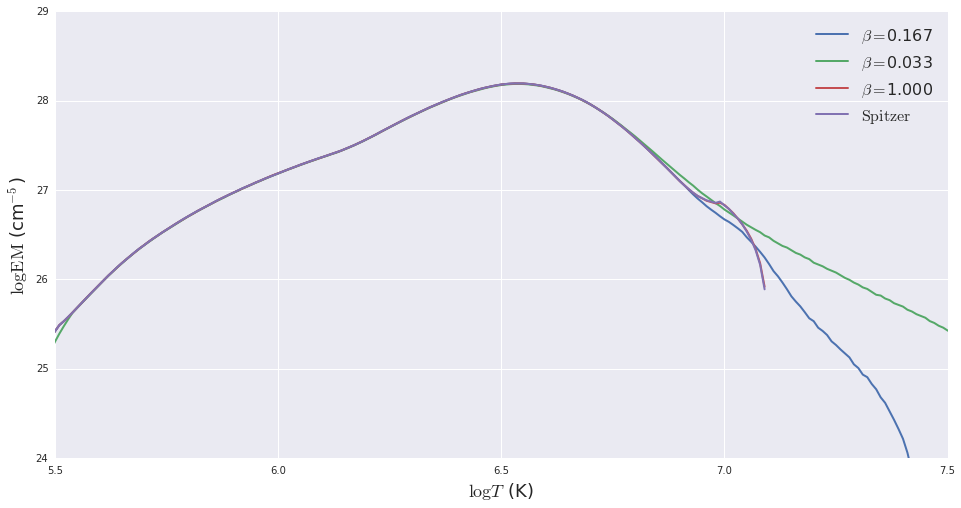

In [51]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for i in range(len(results_flux_lim)):
    if flux_lim[i][1] == 'classical':
        plab = r'$\mathrm{Spitzer}$'
    else:
        plab = r'$\beta=$%.3f'%flux_lim[i][0]
    ax.plot(results_flux_lim[i][0],results_flux_lim[i][1],linewidth=2,label=plab)
ax.set_xlabel(r'$\log{T}$ (K)',fontsize=18)
ax.set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
ax.set_xlim([5.5,7.5])
ax.set_ylim([24,29])
ax.legend(fontsize=16,loc='best')